# CTG Quantitative Analysis #1: The effects of sequence length

In [1]:
# Imports
%matplotlib inline

import pandas as pd
import numpy as np
from pdb import set_trace
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
# GLOBAL VARIABLES
PLOT_DIMS = (11.7, 8.27)
TITLE_SIZE = 30
LABEL_SIZE = 25
TICK_SIZE=20
CI=90
ERR_STYLE='bars'

In [4]:
## initial explorations
# read csv of ctg results of a certain configuration/pplm-setup
# Lets compare GPT2 | Discrim | Unprompted | Young vs Old
gpt2_disc_unp_y = pd.read_csv("../output/ctg_out_am_discrim_pm_gpt2-medium_wl_NA_age_young_WS.csv", encoding="utf-8")
gpt2_disc_unp_o = pd.read_csv("../output/ctg_out_am_discrim_pm_gpt2-medium_wl_NA_age_old_WS.csv", encoding="utf-8")


In [74]:
gpt2_bow_fb85_y = pd.read_csv("../output/ctg_out_am_bow_pm_gpt2-medium_wl_bnc_young_mcwu_ws_pct_85_age_young_WS.csv", encoding="utf-8")
gpt2_bow_fb85_o = pd.read_csv("../output/ctg_out_am_bow_pm_gpt2-medium_wl_bnc_old_mcwu_ws_pct_85_age_old_WS.csv", encoding="utf-8")

In [125]:
dgpt_disc_pr_y = pd.read_csv("../output/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_wl_NA_age_young_WS.csv")
dgpt_disc_pr_o = pd.read_csv("../output/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_wl_NA_age_old_WS.csv")

In [126]:
print(gpt2_disc_unp_y.perplexity.mean())
print(gpt2_disc_unp_o.perplexity.mean())
print(gpt2_bow_fb85_y.perplexity.mean())
print(gpt2_bow_fb85_o.perplexity.mean())
print(dgpt_disc_pr_y.perplexity.mean())
print(dgpt_disc_pr_o.perplexity.mean())

31.94746438194724
33.63063627531549
28.159475693879305
26.794001611073814
41.53563098201045
38.15665494424326


In [13]:
def add_correct_col(prob):
    '''
    Adds column to ctg results dataframe indicating if BERT correctly classified generated sequence. 1 if correct, 0 otherwise.
    Args:
        prob (float): assigned probability of belonging to relevant age group
    '''
    
    assert 0 <= prob <= 1
    
    return 1 if prob >= 0.5 else 0
    

In [16]:
# Add correct column
gpt2_disc_unp_y['correct'] = gpt2_disc_unp_y['young_prob'].apply(add_correct_col)
gpt2_disc_unp_o['correct'] = gpt2_disc_unp_o['old_prob'].apply(add_correct_col)

In [78]:
gpt2_bow_fb85_y['correct'] = gpt2_bow_fb85_y['young_prob'].apply(add_correct_col)
gpt2_bow_fb85_o['correct'] = gpt2_bow_fb85_o['old_prob'].apply(add_correct_col)

In [127]:
dgpt_disc_pr_y['correct'] = dgpt_disc_pr_y['young_prob'].apply(add_correct_col)
dgpt_disc_pr_o['correct'] = dgpt_disc_pr_o['old_prob'].apply(add_correct_col)

In [128]:
print(gpt2_disc_unp_y.correct.mean())
print(gpt2_disc_unp_o.correct.mean())
print(gpt2_bow_fb85_y.correct.mean())
print(gpt2_bow_fb85_o.correct.mean())
print(dgpt_disc_pr_y.correct.mean())
print(dgpt_disc_pr_o.correct.mean())

0.7773109243697479
0.726890756302521
0.6925925925925925
0.6416666666666667
0.8407407407407408
0.5555555555555556


In [129]:
# Binning the data
bins = [0, 10, 20, 30, 40, 50, 60]
bin_labels = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60"]
gpt2_disc_unp_y['length_binned'] = pd.cut(gpt2_disc_unp_y['text_length'], bins=bins, labels=bin_labels)
gpt2_disc_unp_o['length_binned'] = pd.cut(gpt2_disc_unp_o['text_length'], bins=bins, labels=bin_labels)
gpt2_bow_fb85_y['length_binned'] = pd.cut(gpt2_bow_fb85_y['text_length'], bins=bins, labels=bin_labels)
gpt2_bow_fb85_o['length_binned'] = pd.cut(gpt2_bow_fb85_o['text_length'], bins=bins, labels=bin_labels)
dgpt_disc_pr_y['length_binned'] = pd.cut(dgpt_disc_pr_y['text_length'], bins=bins, labels=bin_labels)
dgpt_disc_pr_o['length_binned'] = pd.cut(dgpt_disc_pr_o['text_length'], bins=bins, labels=bin_labels)

In [130]:
gpt2_disc_unp_y['length_binned'].value_counts()

20-30    63
0-10     59
10-20    40
30-40    37
40-50    27
50-60    12
Name: length_binned, dtype: int64

In [131]:
gpt2_disc_unp_o['length_binned'].value_counts()

20-30    63
10-20    53
0-10     52
30-40    44
40-50    21
50-60     5
Name: length_binned, dtype: int64

In [132]:
gpt2_bow_fb85_y['length_binned'].value_counts()

30-40    69
20-30    57
40-50    53
0-10     40
10-20    33
50-60    18
Name: length_binned, dtype: int64

In [133]:
gpt2_bow_fb85_o['length_binned'].value_counts()

20-30    58
40-50    55
0-10     38
30-40    37
10-20    33
50-60    19
Name: length_binned, dtype: int64

In [134]:
dgpt_disc_pr_y['length_binned'].value_counts()

10-20    92
20-30    78
0-10     56
30-40    33
40-50    11
50-60     0
Name: length_binned, dtype: int64

In [135]:
dgpt_disc_pr_o['length_binned'].value_counts()

10-20    86
20-30    82
0-10     54
30-40    41
40-50     7
50-60     0
Name: length_binned, dtype: int64

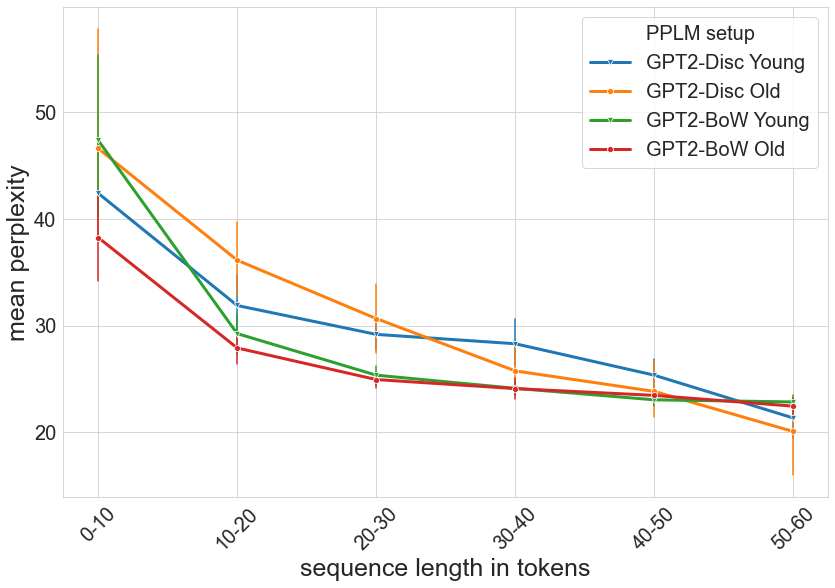

In [145]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_unp_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_unp_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=gpt2_bow_fb85_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb85_o, x='length_binned', y='perplexity', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_disc_pr_y, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_pr_o, x='length_binned', y='perplexity', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE)
plt.ylabel("mean perplexity", fontsize = LABEL_SIZE)
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
plt.tight_layout()
plt.savefig(f'../figures/lineplot_len_ppl_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

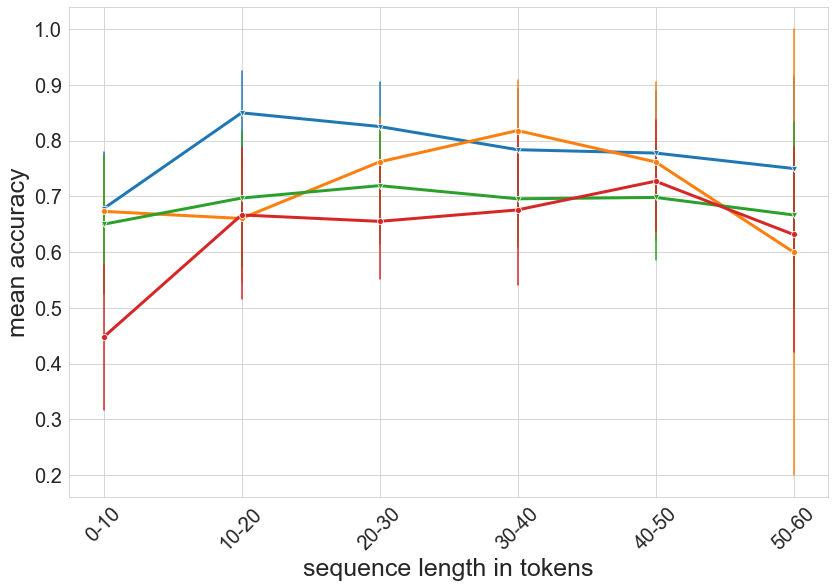

In [152]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_unp_y, x='length_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_unp_o, x='length_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=gpt2_bow_fb85_y, x='length_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb85_o, x='length_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3) 

# sns.lineplot(data=dgpt_disc_pr_y, x='length_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_pr_o, x='length_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE)
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE)
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f'../figures/lineplot_len_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

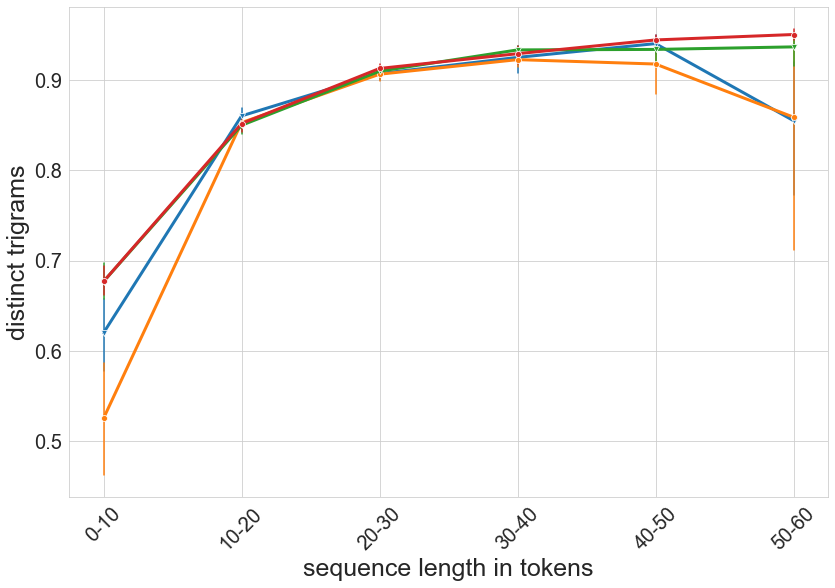

In [154]:
CI# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_unp_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_unp_o, x='length_binned', y='dist_3', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=gpt2_bow_fb85_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb85_o, x='length_binned', y='dist_3', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_disc_pr_y, x='length_binned', y='dist_3', marker="v", ci=CI, label='DGPT-Disc Young', err_style='bars', linewidth=3)
# sns.lineplot(data=dgpt_disc_pr_o, x='length_binned', y='dist_3', marker="v", ci=CI, label='DGPT-Disc Old', err_style='bars', linewidth=3)


plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE)
plt.ylabel("distinct trigrams", fontsize = LABEL_SIZE)
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f'../figures/lineplot_len_dist3_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

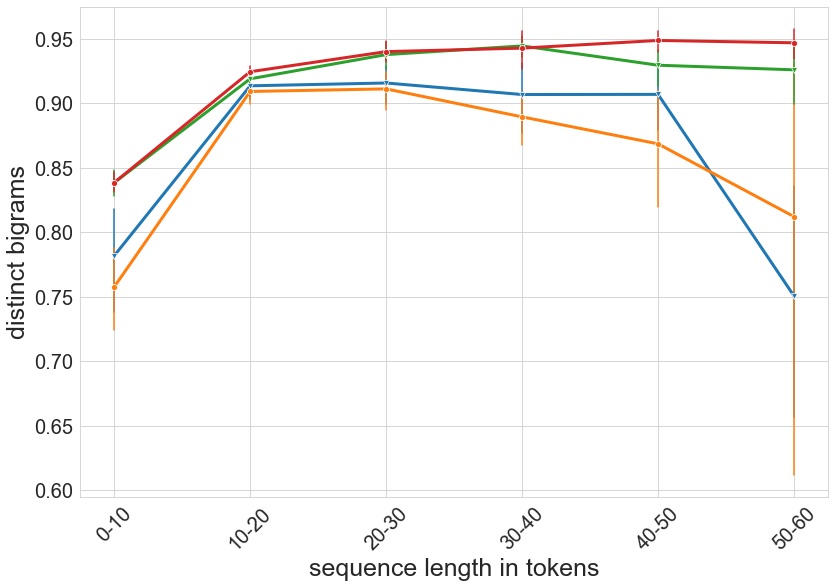

In [156]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_unp_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_unp_o, x='length_binned', y='dist_2', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb85_y, x='length_binned', y='dist_2', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb85_o, x='length_binned', y='dist_2', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3) 
plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE)
plt.ylabel("distinct bigrams", fontsize = LABEL_SIZE)
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f'../figures/lineplot_len_dist2_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

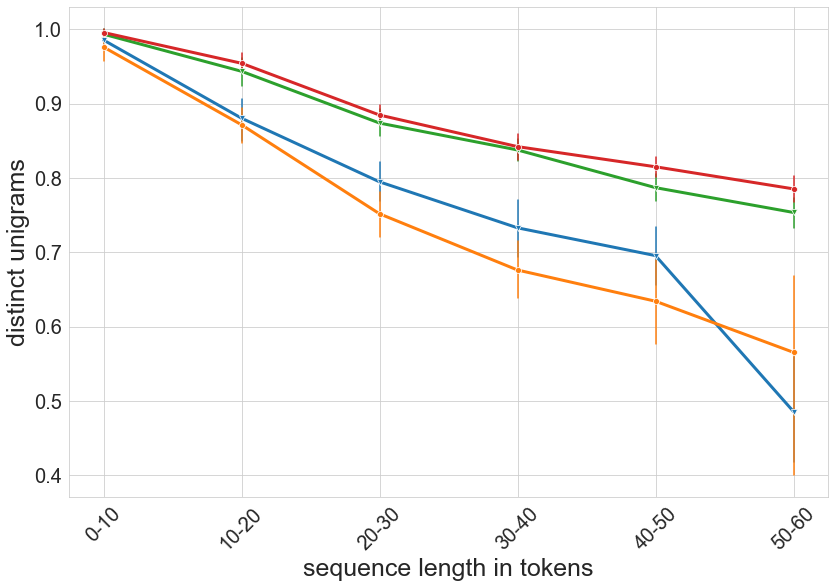

In [157]:
# gpt2_disc_unp_y.hist(x='text_length', y='perplexity')
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

sns.lineplot(data=gpt2_disc_unp_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_disc_unp_o, x='length_binned', y='dist_1', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb85_y, x='length_binned', y='dist_1', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=gpt2_bow_fb85_o, x='length_binned', y='dist_1', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3) 
plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("sequence length in tokens", fontsize = LABEL_SIZE)
plt.ylabel("distinct unigrams", fontsize = LABEL_SIZE)
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig(f'../figures/lineplot_len_dist1_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

In [53]:
gpt2_disc_unp_y.text_length.describe()

count    238.000000
mean      24.126050
std       14.912999
min        1.000000
25%       11.000000
50%       23.000000
75%       34.750000
max       59.000000
Name: text_length, dtype: float64

<AxesSubplot:xlabel='text_length', ylabel='perplexity'>

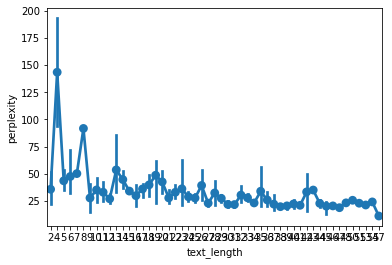

In [43]:
sns.pointplot(data=gpt2_disc_unp_o, x='text_length', y='perplexity')

<AxesSubplot:xlabel='text_length', ylabel='dist_1'>

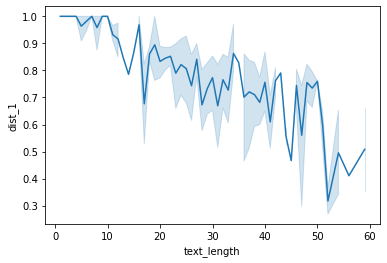

In [33]:
sns.lineplot(data=gpt2_disc_unp_y, x='text_length', y='dist_1')

<AxesSubplot:xlabel='text_length', ylabel='Count'>

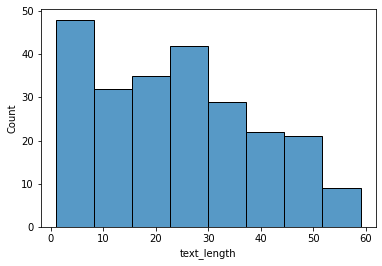

In [46]:
sns.histplot(data=gpt2_disc_unp_y, x='text_length', bins=8)